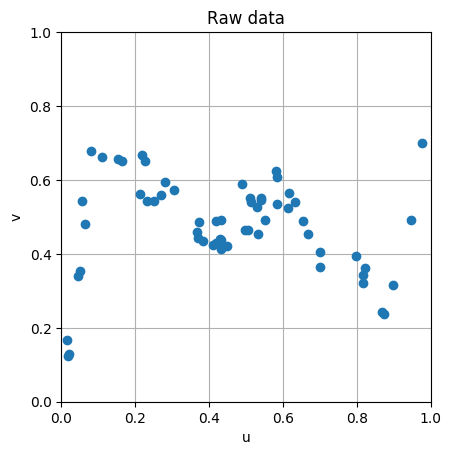

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [1]:
using PyPlot

n = 60;

function f(x::Number)
    y = 0.5 + 100*(x-0.94)*(x-0.7)*(x-0.5)*(x-0.3)*(x-0.06)
end

srand(84);
u = sort(rand(n));
w = 0.05*randn(n);
v = f.(u) + w;

figure();
plot(u,v,"o");
grid("on");
axis("square");
xlim(0, 1);
ylim(0, 1);
xlabel("u");
ylabel("v");
title("Raw data");


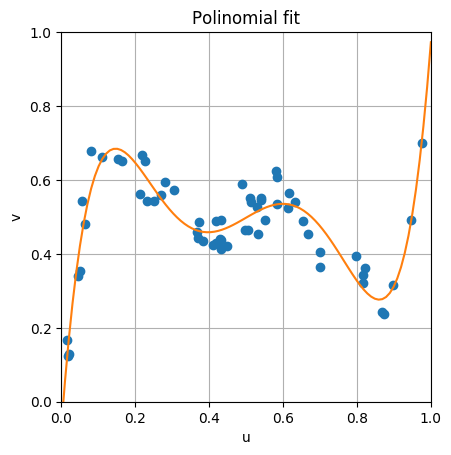

In [2]:
d =6;

X = zeros(n,d);
for i=1:d
    X[:,i] = u.^(i-1);
end
y = v;

theta_opt = X\y;

vp = linspace(0,1,100);

X_vp = zeros(length(vp),d);
for i=1:d
    X_vp[:,i] = vp.^(i-1);
end

figure();
plot(u,v,"o");
plot(vp,X_vp*theta_opt);
grid("on");
axis("square");
xlim(0, 1);
ylim(0, 1);
xlabel("u");
ylabel("v");
title("Polinomial fit");


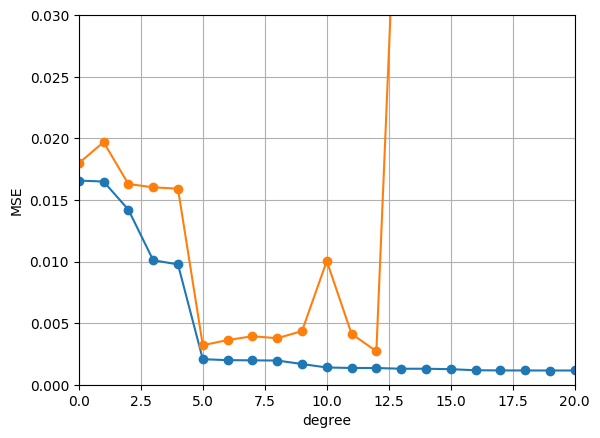

In [3]:
n_train = round(Int, 0.8*n ); 
n_test = n - n_train; 

d_test = 21;
train_loss = zeros(d_test);
test_loss = zeros(d_test);

random_id = randperm(n);
u_train = u[random_id[1:n_train],:];
v_train = v[random_id[1:n_train],:];
u_test  = u[random_id[n_train+1:end],:];
v_test  = v[random_id[n_train+1:end],:];

for d=1:d_test

    X_train = zeros(n_train,d);
    y_train = zeros(n_train,1);
    X_test  = zeros(n_test,d);
    y_test  = zeros(n_test,1);
    for i=1:d
        X_train[:,i] = u_train.^(i-1);
        X_test[:,i]  = u_test.^(i-1);
    end
    y_train = v_train;
    y_test = v_test;

    theta_opt = X_train\y_train;
    
    train_loss[d] = norm(X_train*theta_opt - y_train,2)^2/n_train;
    test_loss[d]  = norm(X_test*theta_opt - y_test,2)^2/n_test;
end

figure();
plot(0:d_test-1,train_loss,"o-");
plot(0:d_test-1,test_loss,"o-");
grid("on");
xlim(0,d_test-1);
ylim(0,0.03);
xlabel("degree");
ylabel("MSE");
